### Loading the image

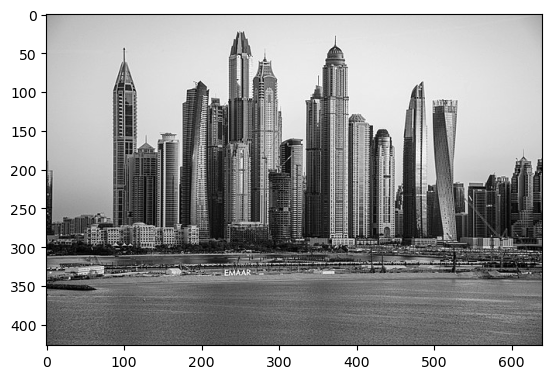

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread('/Users/himanshugulechha/Desktop/MSc AI&ML/Sem3/CV/Dubai_Marina_Skyline.jpg',0)
plt.imshow(img,'gray')

### Box Blur

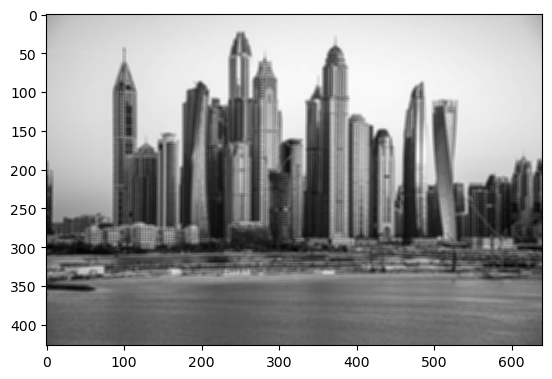

In [2]:
kernel1=np.ones((5,5),dtype=np.float32)/30
image=cv2.filter2D(src=img,kernel=kernel1,ddepth=-1)
plt.imshow(image,'gray')

### Edge Detection

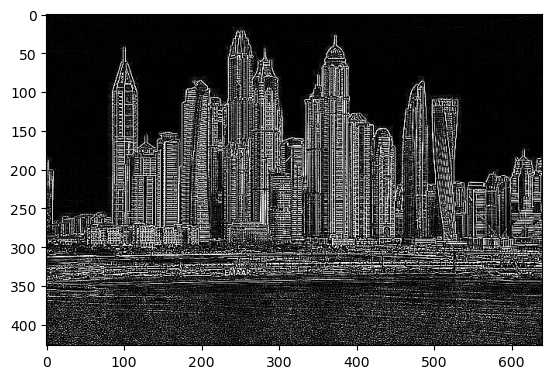

In [3]:
kernel2=np.array([[-1,-1,-1],
                   [-1,8,-1],
                   [-1,-1,-1]])
image=cv2.filter2D(src=img,kernel=kernel2,ddepth=-1)
plt.imshow(image,'gray')

### Fourier Transforamtion

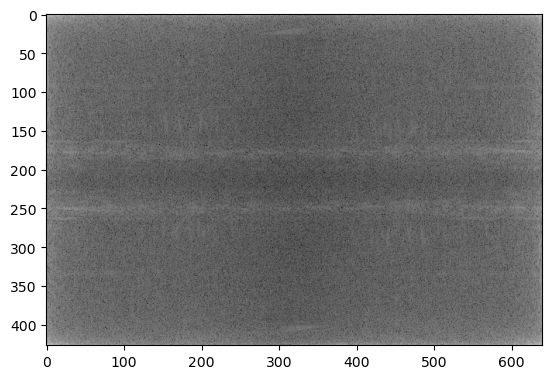

In [4]:
F=np.fft.fft2(img)
plt.imshow(np.log1p(np.abs(F)),'gray')

### Shift

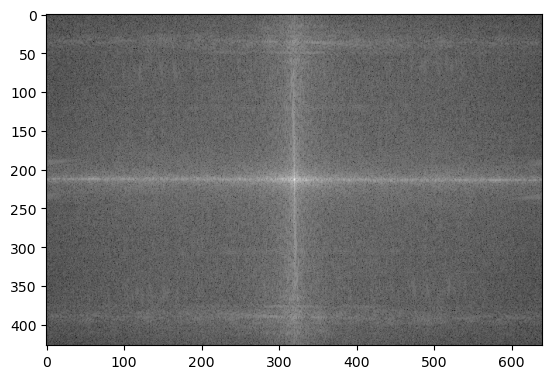

In [5]:
F_shift=np.fft.fftshift(F)
plt.imshow(np.log1p(np.abs(F_shift)),'gray')

### Ideal Low Pass Filter

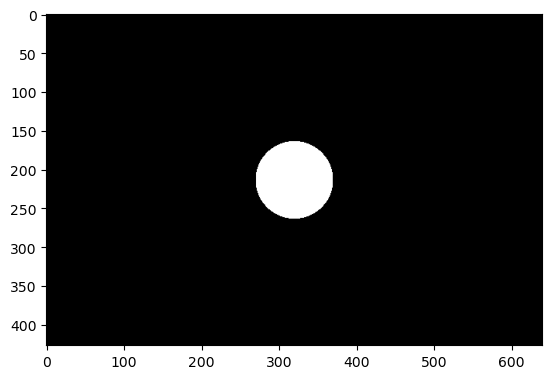

In [6]:
M,N=img.shape
H=np.zeros((M,N),dtype=np.float32)
D0=50
for u in range(M):
    for v in range(N):
        D=np.sqrt((u-M/2)**2+(v-N/2)**2)
        if D<=D0:
            H[u,v]=1
        else:
            H[u,v]=0
plt.imshow(H,'gray')

### Multiplying filter with image

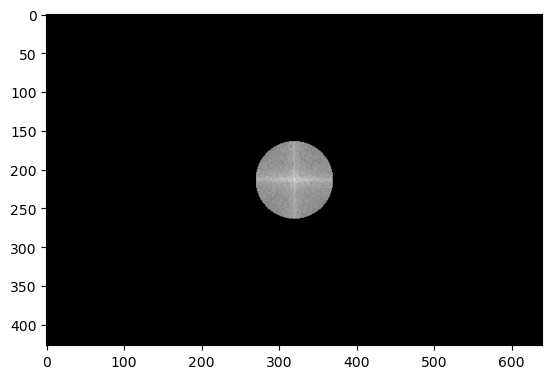

In [7]:
G=F_shift*H
plt.imshow(np.log1p(np.abs(G)),'gray')

### Inverse shift

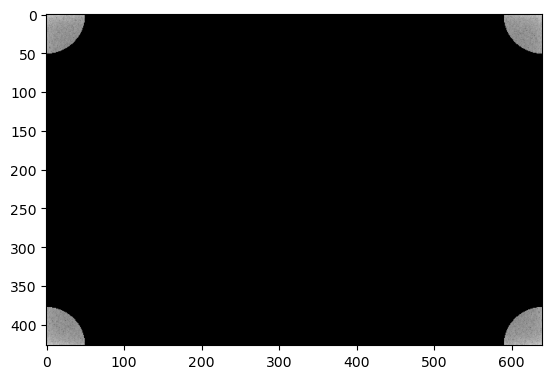

In [8]:
G_shift=np.fft.ifftshift(G)
plt.imshow(np.log1p(np.abs(G_shift)),'gray')

### Inverse fourier transformation

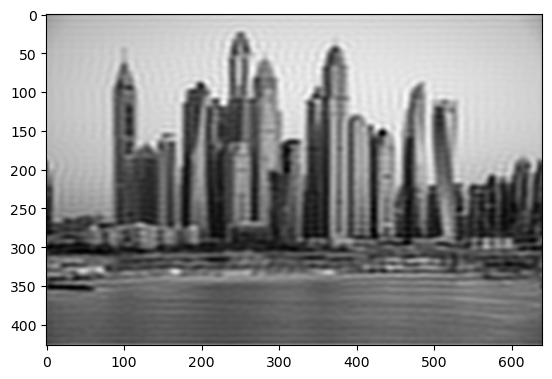

In [9]:
g=np.abs(np.fft.ifft2(G_shift))
plt.imshow(g,'gray')

### Ideal High Pass Filter

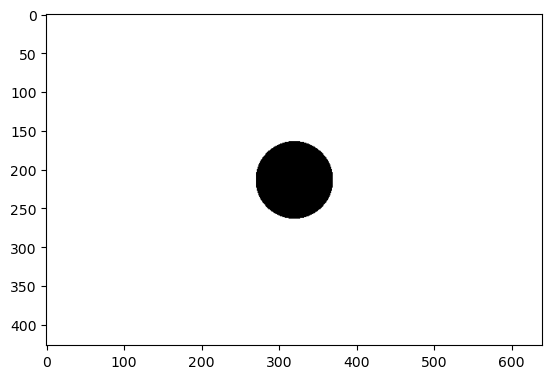

In [10]:
H1=1-H
plt.imshow(H1,'gray')

### Inverse shift

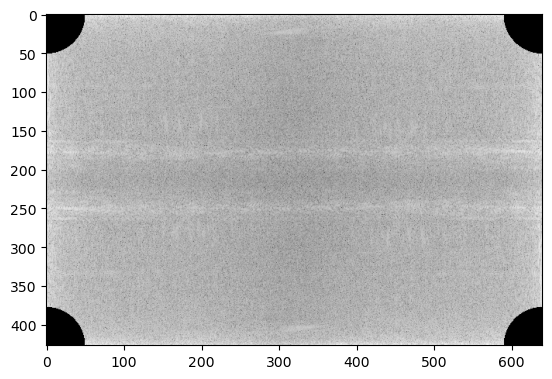

In [11]:
G=F_shift*H1
G_shift=np.fft.ifftshift(G)
plt.imshow(np.log1p(np.abs(G_shift)),'gray')

### Inverse fourier transformation

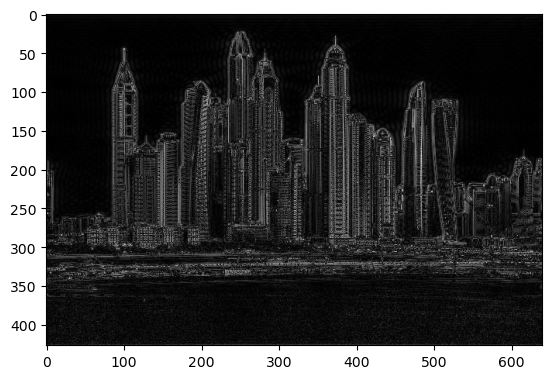

In [12]:
g=np.abs(np.fft.ifft2(G_shift))
plt.imshow(g,'gray')